# Context

As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

# Objective
The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

## Define the problem and perform Exploratory Data Analysis
### Read the data as an appropriate time series data

In [1]:
# Import Libraies
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels

In [2]:
df = pd.read_csv('Sparkling.csv')
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
# Convert the 'YearMonth' column to datetime format
df['Date'] = pd.to_datetime(df['YearMonth'].astype(str) + '-01')
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  187 non-null    object        
 1   Sparkling  187 non-null    int64         
 2   Date       187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.5+ KB


(None,
   YearMonth  Sparkling       Date
 0   1980-01       1686 1980-01-01
 1   1980-02       1591 1980-02-01
 2   1980-03       2304 1980-03-01
 3   1980-04       1712 1980-04-01
 4   1980-05       1471 1980-05-01)

In [5]:
df = df.drop('YearMonth', axis=1)

In [6]:
df.set_index('Date', inplace=True)
df.head

<bound method NDFrame.head of             Sparkling
Date                 
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
...               ...
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

[187 rows x 1 columns]>

### Plot the data

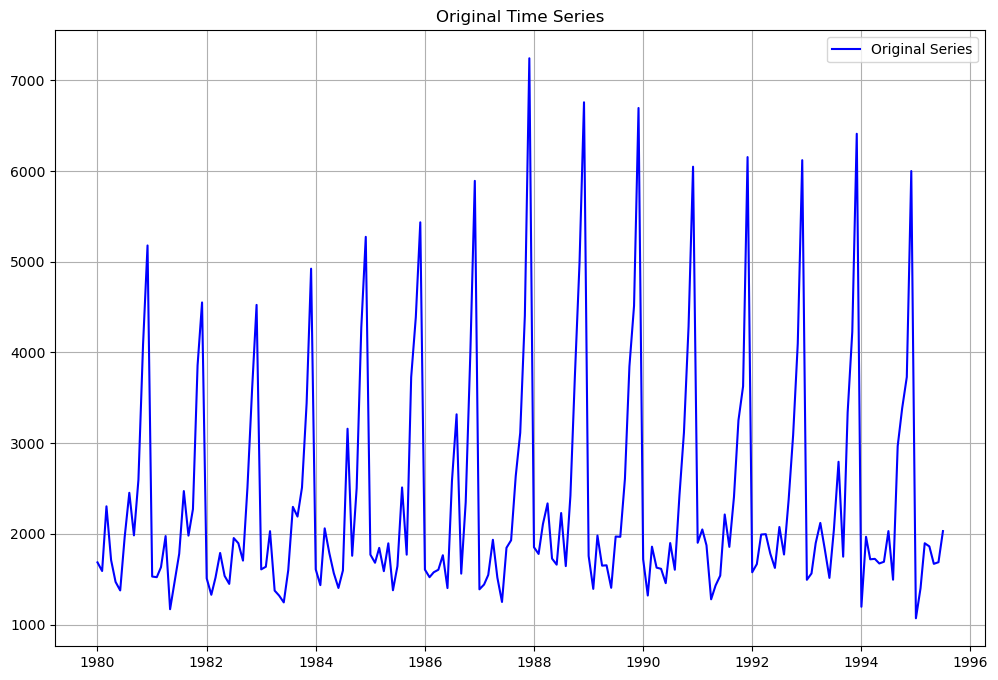

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(df['Sparkling'], label='Original Series', color='blue')
plt.title('Original Time Series')
plt.legend()
plt.grid();

### Perform EDA

In [8]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


### Perform Decomposition

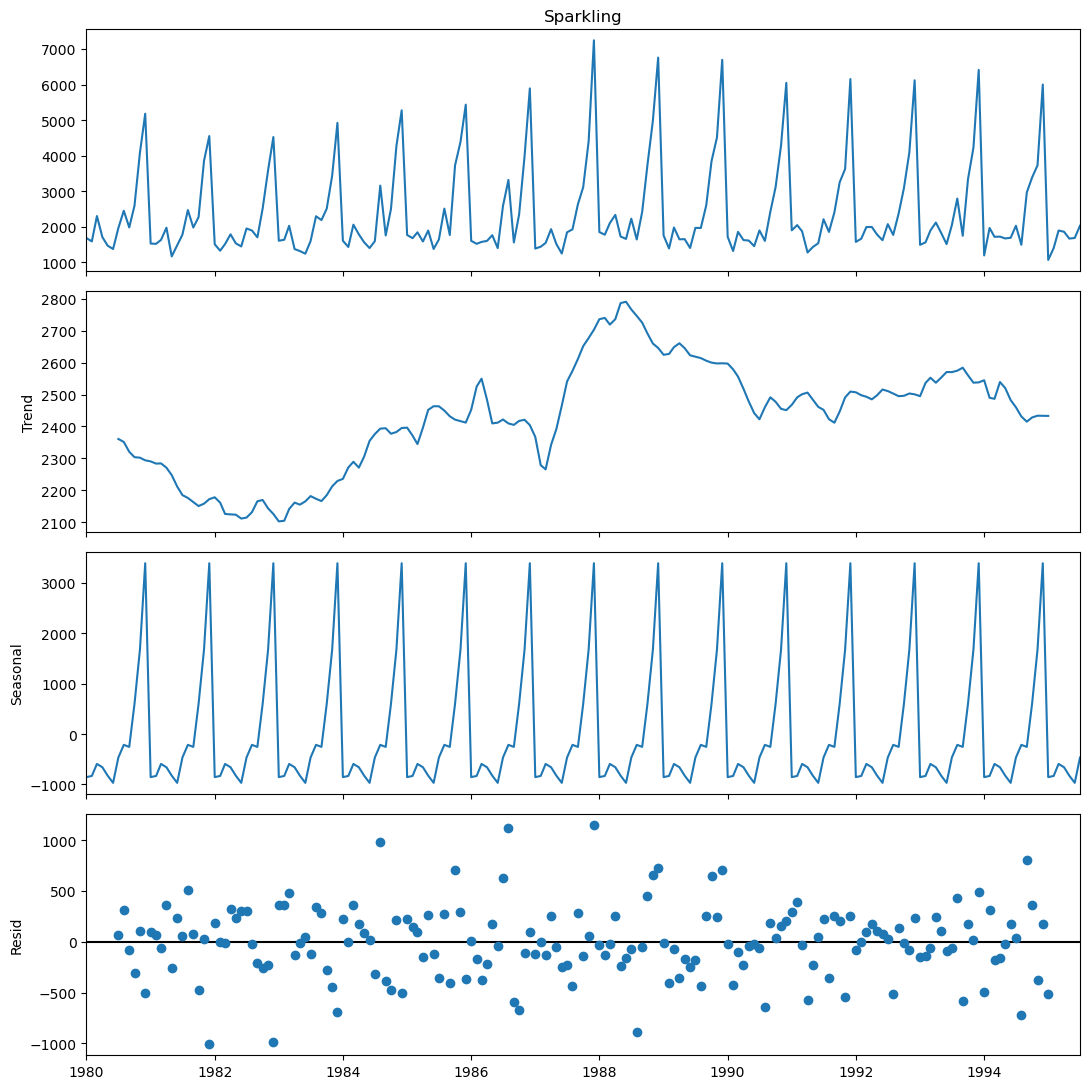

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Sparkling'], model='additive') # Keeping period=default

plt.rcParams['figure.figsize'] = [11, 11]
decomposition.plot()
plt.show()

### Insights:
**Time Series Plot:** The first plot shows the Sparkling wine sales over time, with noticeable fluctuations and potential seasonality in the data.

**Statistics Summary:**
Descriptive statistic summary:
 - Mean sales: 2402
 - Minimum sales: 1070
 - Maximum sales: 7242
 - Standard deviation: 1295, 
 - Indicating some variability in the sales data.
    
**Decomposition:**
The second plot displays the decomposed components:
 - Trend: Shows a general upward or downward movement over time.
 - Seasonality: Displays repeating patterns at regular intervals.
 - Residual: Represents the remaining noise after accounting for trend and seasonality.

## Data Pre-processing

### Missing value treatment

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Sparkling    0
dtype: int64

### Visualize the processed data - Train-test split

In [11]:
# Since there are no missing values, proceed with train-test split
# Splitting data into training (80%) and testing (20%)
# train_size = int(len(df) * 0.8)
# train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

train_data = df[0:int(len(df)*0.8)] 
test_data = df[int(len(df)*0.8):]
print(train_data.shape)
print(test_data.shape)

(149, 1)
(38, 1)


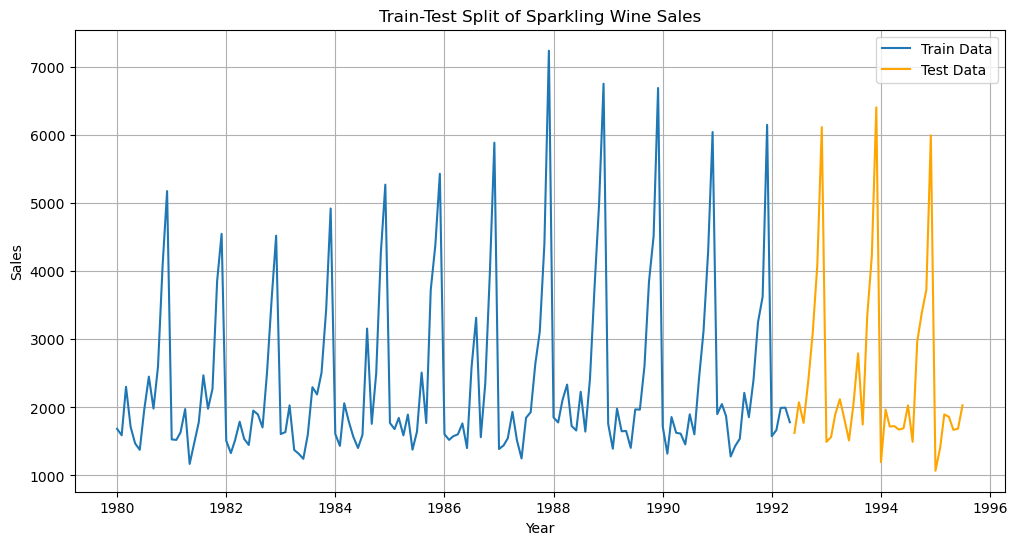

In [12]:
# Plot the training and testing data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sparkling'], label='Train Data')
plt.plot(test_data.index, test_data['Sparkling'], label='Test Data', color='orange')
plt.title('Train-Test Split of Sparkling Wine Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

## Model Building - Original Data
### Build forecasting models

### Linear regression

In [13]:
train_time = [i+1 for i in range(len(train_data))]
test_time = [i+150 for i in range(len(test_data))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
Test Time instance 
 [150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [14]:
LinearRegression_train = train_data.copy()
LinearRegression_test = test_data.copy()

In [15]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Date                       
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
Date                       
1992-01-01       1577   145
1992-02-01       1667   146
1992-03-01       1993   147
1992-04-01       1997   148
1992-05-01       1783   149 

First few rows of Test Data 
             Sparkling  time
Date                       
1992-06-01       1625   150
1992-07-01       2076   151
1992-08-01       1773   152
1992-09-01       2377   153
1992-10-01       3088   154 

Last few rows of Test Data 
             Sparkling  time
Date                       
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [16]:
#Now that our training and test data has been modified, we can go ahead and build a linear regression model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(LinearRegression_train[['time']], LinearRegression_train['Sparkling'].values)

test_predictions_model1 = lr_model.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

#lr_preds = lr_model.predict(test_X)

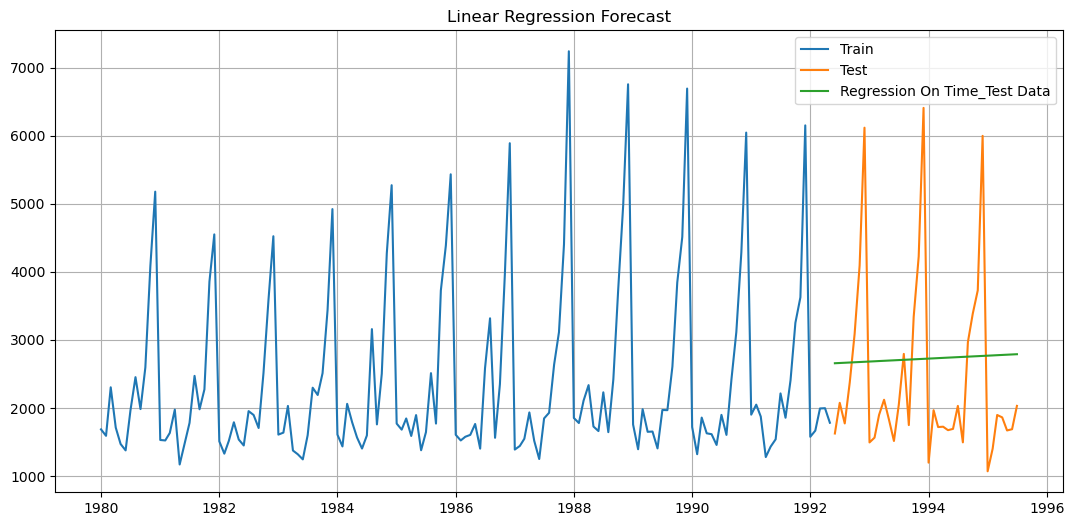

In [17]:
plt.figure(figsize=(13,6))
plt.plot(train_data['Sparkling'], label='Train')
plt.plot(test_data['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title("Linear Regression Forecast")
plt.grid();
# Show plot
plt.show()

### Model Evaluation

In [18]:
from sklearn import metrics
rmse_model1_test = metrics.root_mean_squared_error(test_data['Sparkling'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1359.71


In [19]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1359.708262


### Simple Average

In [20]:
SimpleAverage_train = train_data.copy()
SimpleAverage_test = test_data.copy()

In [21]:
SimpleAverage_test['mean_forecast'] = train_data['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Date,,
1992-06-01,1625,2388.610738
1992-07-01,2076,2388.610738
1992-08-01,1773,2388.610738
1992-09-01,2377,2388.610738
1992-10-01,3088,2388.610738


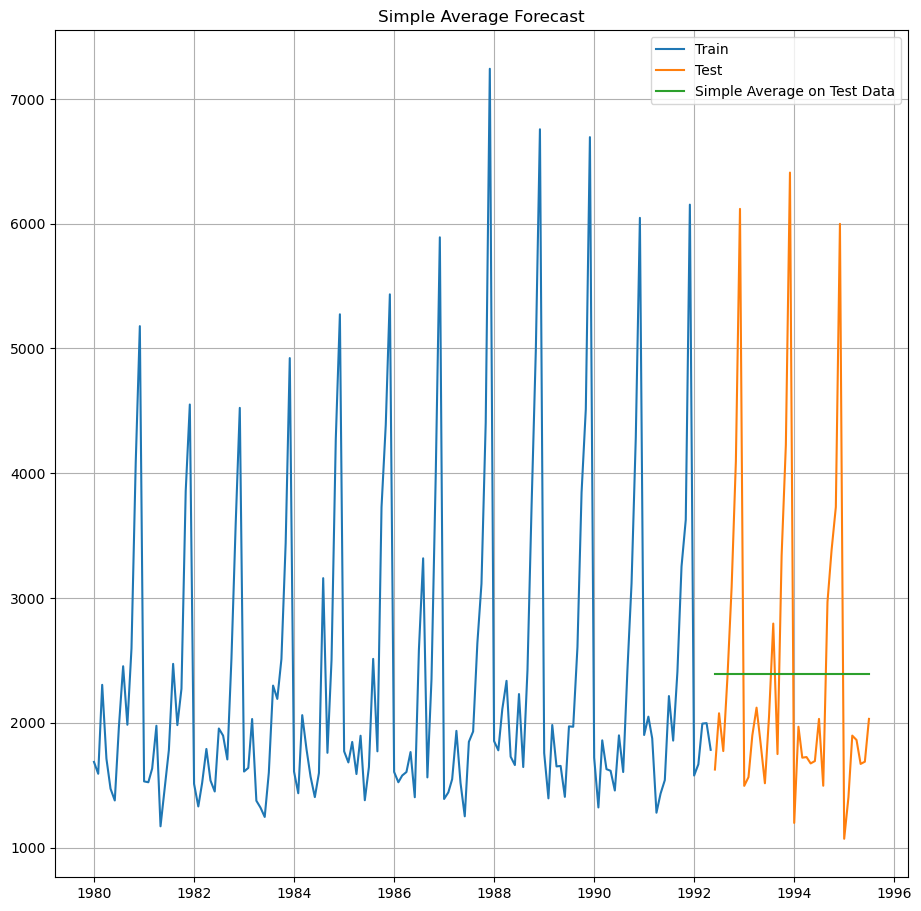

In [22]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid()
plt.show()

### Model Evaluation

In [23]:
#rmse_model2_test = metrics.mean_squared_error(test['Births'],SimpleAverage_test['mean_forecast'],squared=False)
rmse_model2_test = metrics.root_mean_squared_error(test_data['Sparkling'], SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Simple Average forecast on the Test Data,  RMSE is 1331.038


In [24]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1359.708262
SimpleAverageModel,1331.037637


### Moving Average

In [25]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
Date,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [26]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


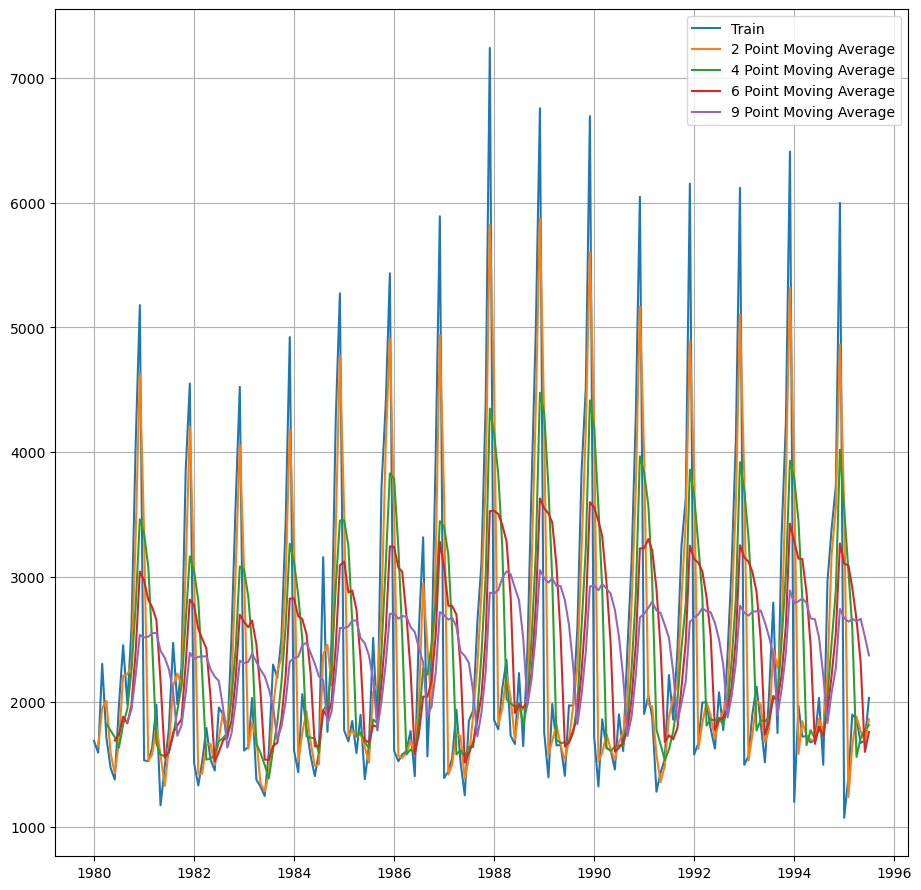

In [27]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'], label ='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'], label ='9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [28]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.8)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.8):]

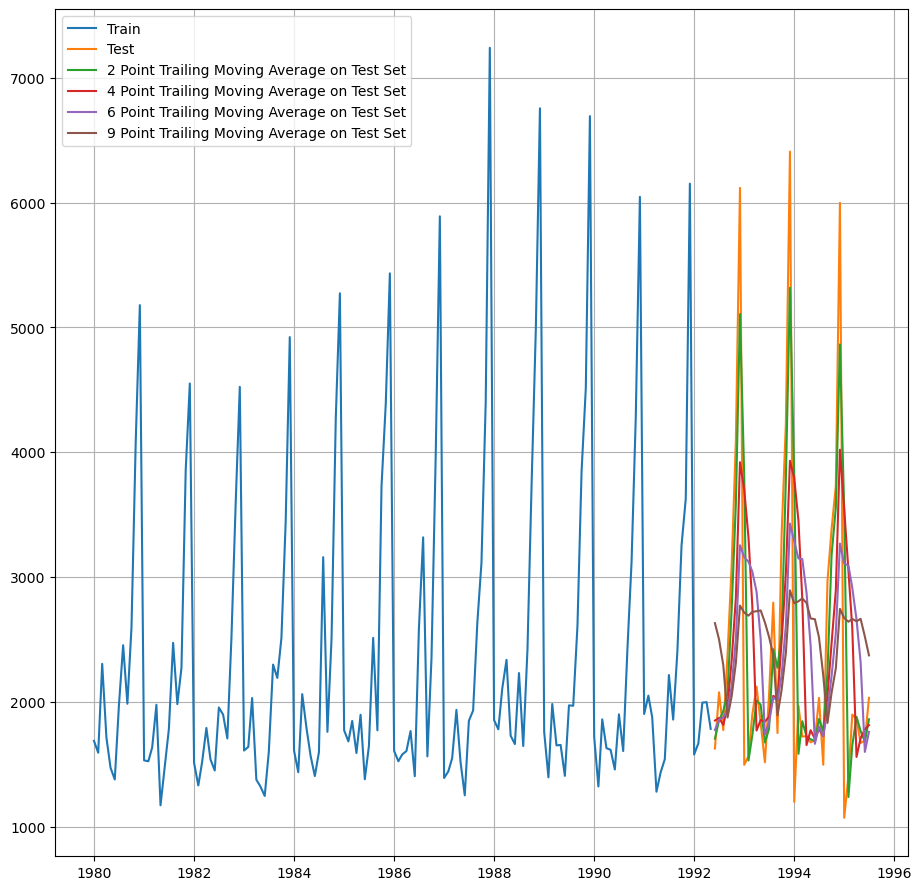

In [29]:
## Plotting on both the Training and Test data
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
#plt.title("Moving Average Forecast")
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

In [30]:
rmse_model4_test_2 = metrics.root_mean_squared_error(test_data['Sparkling'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.root_mean_squared_error(test_data['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.root_mean_squared_error(test_data['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.root_mean_squared_error(test_data['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 805.880
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1161.283
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1290.625
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1375.582


In [31]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1359.708262
SimpleAverageModel,1331.037637
2pointTrailingMovingAverage,805.879970
4pointTrailingMovingAverage,1161.282792
6pointTrailingMovingAverage,1290.624831
9pointTrailingMovingAverage,1375.582351


### Single Exponential Smoothing

In [32]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
SES_train = train_data.copy()
SES_test = test_data.copy()

In [33]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.034868547491829875,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [34]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_data))
SES_test.head()

,Sparkling,predict
Date,,
1992-06-01,1625,2494.202255
1992-07-01,2076,2494.202255
1992-08-01,1773,2494.202255
1992-09-01,2377,2494.202255
1992-10-01,3088,2494.202255


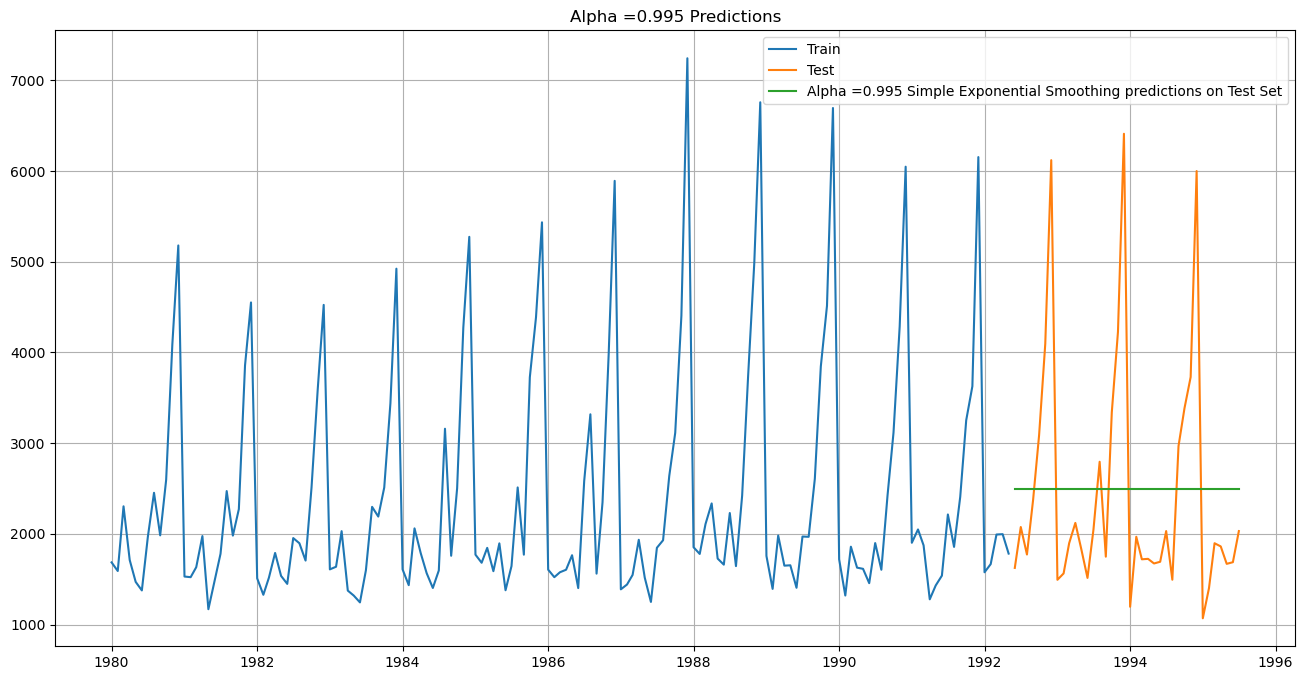

In [35]:
## Plotting on both the Training and Test data
plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.title('Alpha =0.995 Predictions')
plt.grid()
plt.show()

### Model Evaluation

In [36]:
rmse_model5_test_1 = metrics.root_mean_squared_error(SES_test['Sparkling'],SES_test['predict'])
print("For Alpha =0.995 Single Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Single Exponential Smoothing Model forecast on the Test Data, RMSE is 1329.836


In [37]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1359.708262
SimpleAverageModel,1331.037637
2pointTrailingMovingAverage,805.879970
4pointTrailingMovingAverage,1161.282792
6pointTrailingMovingAverage,1290.624831
9pointTrailingMovingAverage,1375.582351
"Alpha=0.995,SimpleExponentialSmoothing",1329.835548


In [38]:
# Setting different alpha values. Remember, the higher the alpha value more weightage is given to the more recent observation.
# We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.
# First we will define an empty dataframe to store our values from the loop

resultsDf_5 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})

for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test_data))
    
    rmse_model5_train_i = metrics.root_mean_squared_error(SES_train['Sparkling'], SES_train['predict',i])
    
    rmse_model5_test_i = metrics.root_mean_squared_error(SES_test['Sparkling'], SES_test['predict',i])

    new_row = pd.DataFrame({'Alpha Values': [i], 
                            'Train RMSE': [rmse_model5_train_i], 
                            'Test RMSE': [rmse_model5_test_i]})
    
    resultsDf_5 = pd.concat([resultsDf_5, new_row], ignore_index=True)

In [39]:
# Evalution of model based on different alpha value
resultsDf_5.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.3,1359.782485,1359.784870
1,0.4,1358.397528,1394.293942
2,0.5,1354.903094,1426.541499
3,0.6,1354.429363,1448.950515
4,0.7,1359.069181,1462.628689
5,0.8,1369.416613,1472.051592
6,0.9,1385.765178,1480.804187


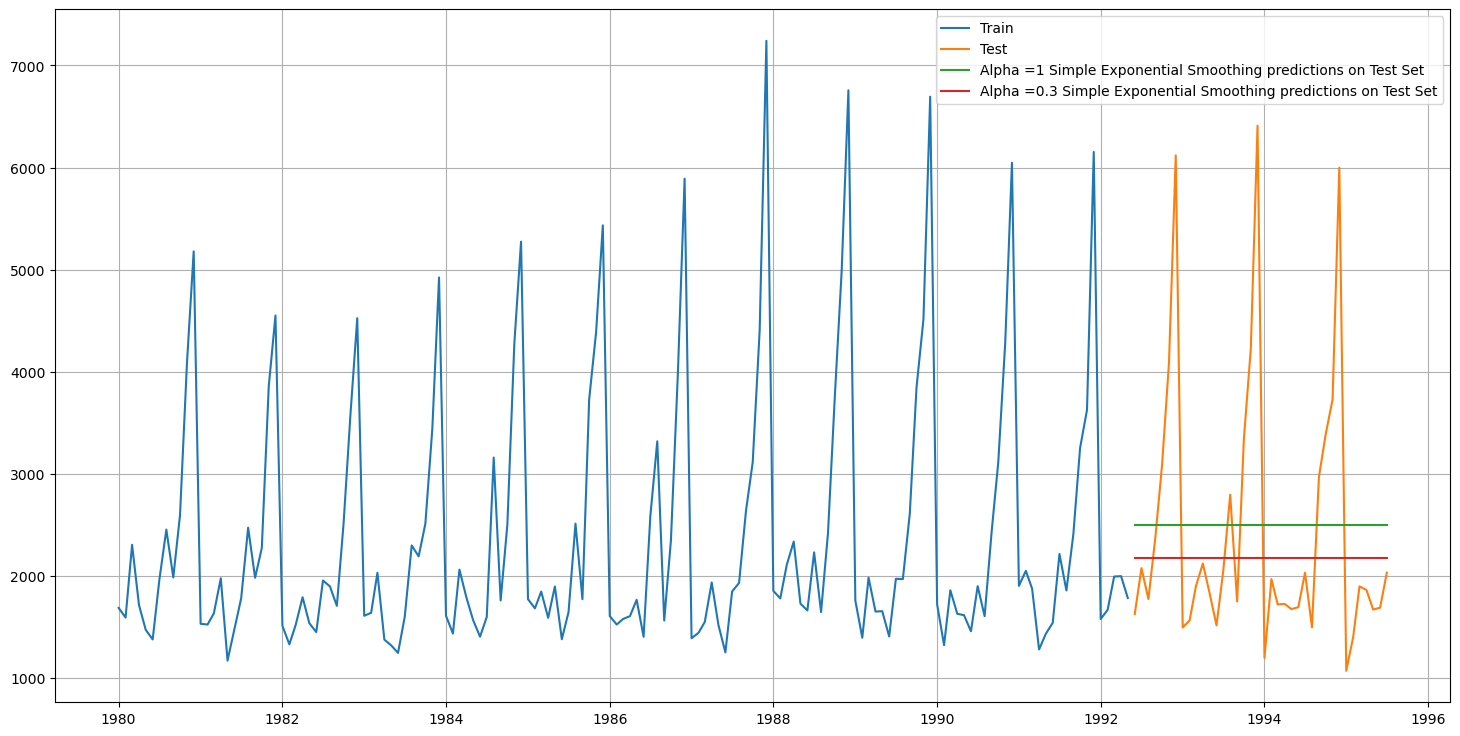

In [40]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set') # Has lowest Test RMSE
plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [41]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_5.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,1359.708262
SimpleAverageModel,1331.037637
2pointTrailingMovingAverage,805.879970
4pointTrailingMovingAverage,1161.282792
6pointTrailingMovingAverage,1290.624831
9pointTrailingMovingAverage,1375.582351
"Alpha=0.995,SimpleExponentialSmoothing",1329.835548
"Alpha=0.3,SimpleExponentialSmoothing",1359.784870


### Double Exponential Smoothing

In [42]:
DES_train = train_data.copy()
DES_test = test_data.copy()

In [43]:
model_DES = Holt(DES_train['Sparkling'])

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [44]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})

for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test_data))
        
        rmse_model6_train = metrics.root_mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.root_mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j])
    
        new_row = pd.DataFrame({'Alpha Values': [i], 
                                'Beta Values': [j],
                            'Train RMSE': [rmse_model6_train], 
                            'Test RMSE': [rmse_model6_test]})
    
        resultsDf_7 = pd.concat([resultsDf_7, new_row], ignore_index=True)        

In [45]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
36,0.7,0.7,1714.323131,1413.512841
45,0.8,0.8,1811.989180,1437.562918
46,0.8,0.9,1869.955439,1512.844361
22,0.5,0.9,1735.895456,1631.867102
44,0.8,0.7,1755.839715,1690.354869


In [46]:
DES_test.columns

Index([                                        'Sparkling',
                                     ('predict', 0.3, 0.3),
                                     ('predict', 0.3, 0.4),
                                     ('predict', 0.3, 0.5),
                      ('predict', 0.3, 0.6000000000000001),
                      ('predict', 0.3, 0.7000000000000002),
                      ('predict', 0.3, 0.8000000000000003),
                      ('predict', 0.3, 0.9000000000000001),
                      ('predict', 0.3, 1.0000000000000002),
                                     ('predict', 0.4, 0.3),
                                     ('predict', 0.4, 0.4),
                                     ('predict', 0.4, 0.5),
                      ('predict', 0.4, 0.6000000000000001),
                      ('predict', 0.4, 0.7000000000000002),
                      ('predict', 0.4, 0.8000000000000003),
                      ('predict', 0.4, 0.9000000000000001),
                      ('predict', 0.4, 1

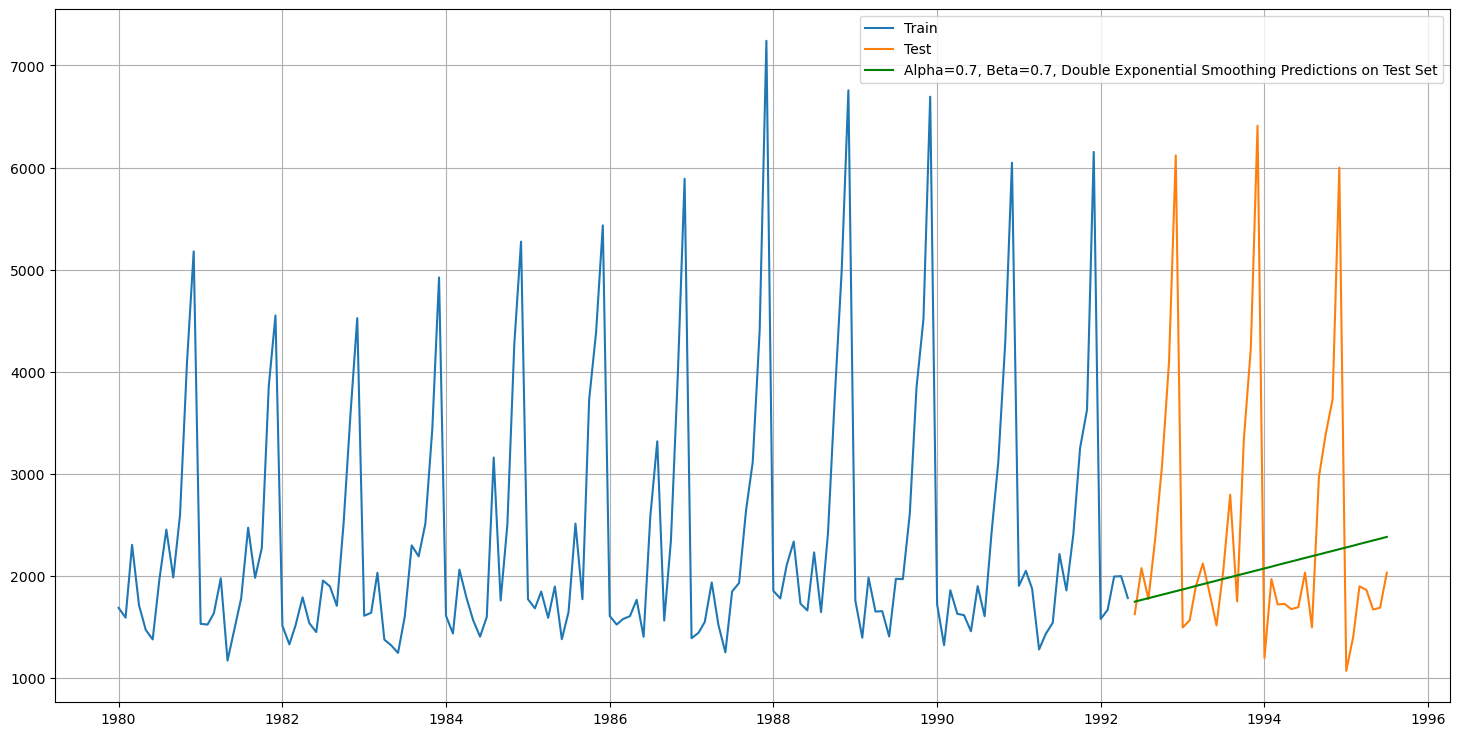

In [47]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.7000000000000002, 0.7000000000000002], label='Alpha=0.7, Beta=0.7, Double Exponential Smoothing Predictions on Test Set', color='green')
    
#plt.plot(DES_test['predict', 0.7, 0.7], label='Alpha=0.7,Beta=0.7,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.show()

### Model Evaluation

In [48]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.7,Beta=0.7,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
RegressionOnTime,1359.708262
SimpleAverageModel,1331.037637
2pointTrailingMovingAverage,805.879970
4pointTrailingMovingAverage,1161.282792
6pointTrailingMovingAverage,1290.624831
9pointTrailingMovingAverage,1375.582351
"Alpha=0.995,SimpleExponentialSmoothing",1329.835548
"Alpha=0.3,SimpleExponentialSmoothing",1359.784870
"Alpha=0.7,Beta=0.7,DoubleExponentialSmoothing",1413.512841


### Triple Exponential Smoothing

In [49]:
TES_train = train_data.copy()
TES_test = test_data.copy()

In [50]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',seasonal_periods=12)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [51]:
model_TES_autofit = model_TES.fit()
model_TES_autofit.params

{'smoothing_level': 0.07576072430661668,
 'smoothing_trend': 0.0757569226305737,
 'smoothing_seasonal': 0.34233995325669975,
 'damping_trend': nan,
 'initial_level': 2356.5067962632284,
 'initial_trend': -13.954366127687548,
 'initial_seasons': array([0.72038399, 0.68922005, 0.90648756, 0.80593465, 0.65572497,
        0.65080738, 0.88275852, 1.13409722, 0.92512911, 1.22874598,
        1.91773531, 2.42850239]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test_data))
TES_test.head()

,Sparkling,auto_predict
Date,,
1992-06-01,1625,1487.898177
1992-07-01,2076,2075.117459
1992-08-01,1773,1939.901235
1992-09-01,2377,2424.487749
1992-10-01,3088,3329.623297


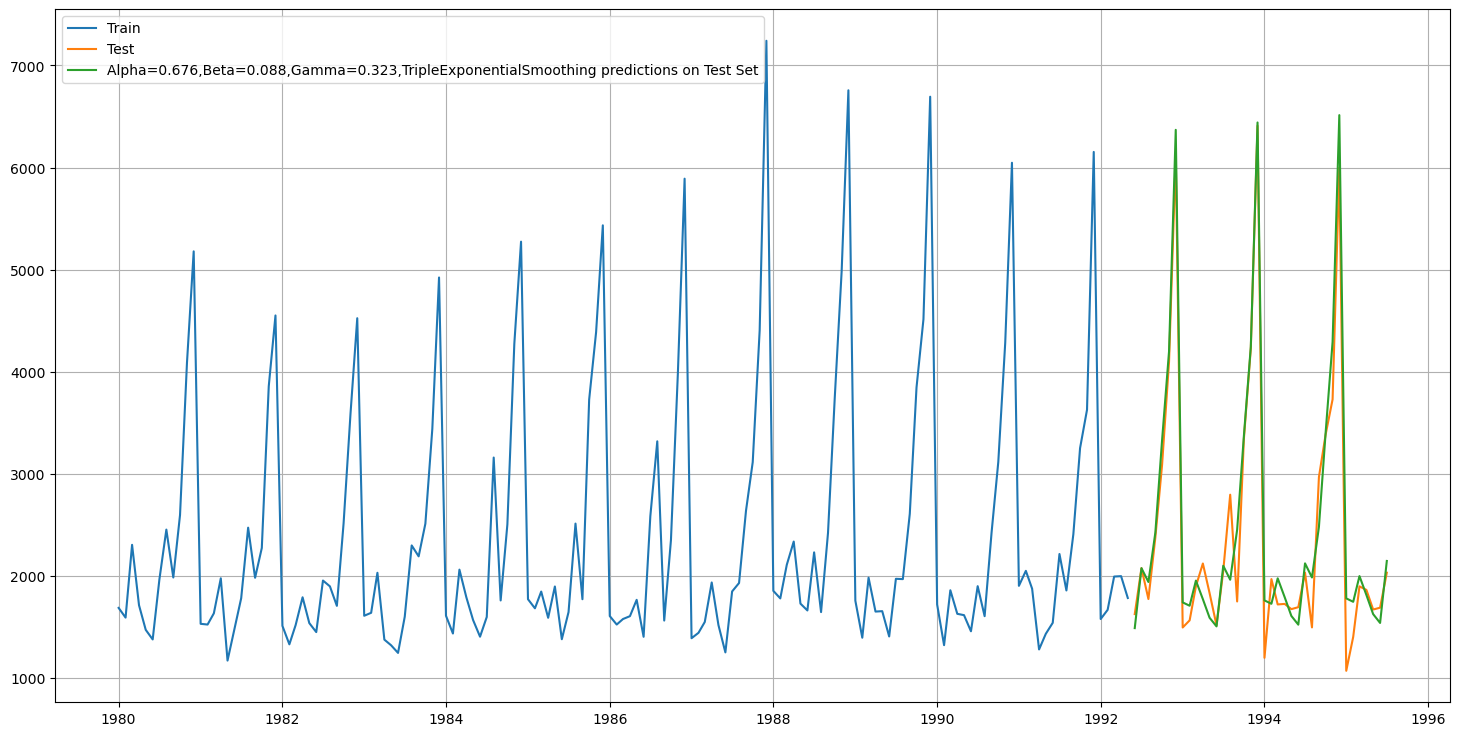

In [53]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();
plt.show()

### Model Evaluation

In [54]:
rmse_model6_test_1 = metrics.root_mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'])
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 318.533


In [55]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,1359.708262
SimpleAverageModel,1331.037637
2pointTrailingMovingAverage,805.879970
4pointTrailingMovingAverage,1161.282792
6pointTrailingMovingAverage,1290.624831
9pointTrailingMovingAverage,1375.582351
"Alpha=0.995,SimpleExponentialSmoothing",1329.835548
"Alpha=0.3,SimpleExponentialSmoothing",1359.784870
"Alpha=0.7,Beta=0.7,DoubleExponentialSmoothing",1413.512841
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",318.532779


In [56]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})

for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test_data))
        
            rmse_model8_train = metrics.root_mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k])
            
            rmse_model8_test = metrics.root_mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k])

            new_row = pd.DataFrame({'Alpha Values': [i], 
                                'Beta Values': [j],
                                'Gamma Values': [k],
                            'Train RMSE': [rmse_model8_train], 
                            'Test RMSE': [rmse_model8_test]})
    
            resultsDf_8_2 = pd.concat([resultsDf_8_2, new_row], ignore_index=True)  

C:\Users\sjaigu\AppData\Local\Temp\ipykernel_26012\1524798997.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test_data))
C:\Users\sjaigu\AppData\Local\Temp\ipykernel_26012\1524798997.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\sjaigu\AppData\Local\Temp\ipykernel_26012\1524798997.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

In [57]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
257,0.7,0.3,0.4,528.822969,514.815688
200,0.6,0.4,0.3,492.947792,627.171672
96,0.4,0.7,0.3,500.669980,688.536684
144,0.5,0.5,0.3,488.750680,717.056843
256,0.7,0.3,0.3,492.626330,733.071728


In [58]:
TES_test.columns

Index([                                                            'Sparkling',
                                                                'auto_predict',
                                                    ('predict', 0.3, 0.3, 0.3),
                                                    ('predict', 0.3, 0.3, 0.4),
                                                    ('predict', 0.3, 0.3, 0.5),
                                     ('predict', 0.3, 0.3, 0.6000000000000001),
                                     ('predict', 0.3, 0.3, 0.7000000000000002),
                                     ('predict', 0.3, 0.3, 0.8000000000000003),
                                     ('predict', 0.3, 0.3, 0.9000000000000001),
                                     ('predict', 0.3, 0.3, 1.0000000000000002),
       ...
       ('predict', 1.0000000000000002, 0.9000000000000001, 0.9000000000000001),
       ('predict', 1.0000000000000002, 0.9000000000000001, 1.0000000000000002),
                      ('predi

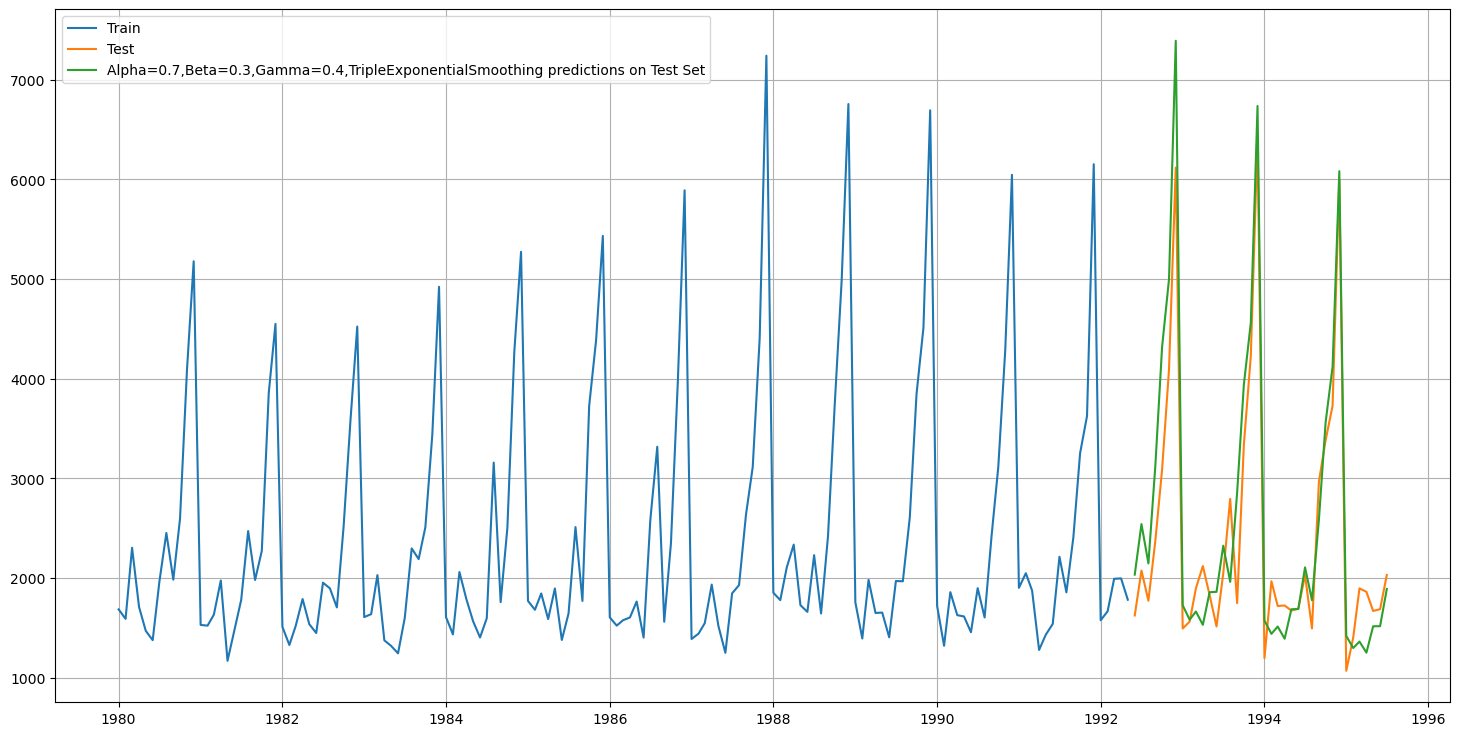

In [59]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['predict', 0.7000000000000002, 0.3, 0.4], label='Alpha=0.7,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [60]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE
RegressionOnTime,1359.708262
SimpleAverageModel,1331.037637
2pointTrailingMovingAverage,805.879970
4pointTrailingMovingAverage,1161.282792
6pointTrailingMovingAverage,1290.624831
9pointTrailingMovingAverage,1375.582351
"Alpha=0.995,SimpleExponentialSmoothing",1329.835548
"Alpha=0.3,SimpleExponentialSmoothing",1359.784870
"Alpha=0.7,Beta=0.7,DoubleExponentialSmoothing",1413.512841
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",318.532779


### Check the performance of the models built


In [61]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",318.532779
"Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing",514.815688
2pointTrailingMovingAverage,805.879970
4pointTrailingMovingAverage,1161.282792
6pointTrailingMovingAverage,1290.624831
"Alpha=0.995,SimpleExponentialSmoothing",1329.835548
SimpleAverageModel,1331.037637
RegressionOnTime,1359.708262
"Alpha=0.3,SimpleExponentialSmoothing",1359.784870
9pointTrailingMovingAverage,1375.582351


### Inisghts:

**Best Performing Model:**
- Triple Exponential Smoothtng (Alpha=0.676, Beta=0.088, Gamma=0.323) has the lowest RMSE of 318.53. This indicates that this model provides the most accurate forecasts among those listed, effectively capturing trends and seasonality in the data.

**Moderate Performance:**
- The second-best model is also a Triple Exponential Smoothing model with parameters (Alpha=1.0, Beta=0.7, Gamma=0.3), which has an RMSE of 514.82. While it performs well, it is significantly less accurate than the best-performing model, suggesting that the specific parameter choices greatly influence its performance.

**Moving Average Models:**
- The 2-point Trailing Moving Average model has an RMSE of 805.88, indicating a moderate level of accuracy but still far from the top models. As the window size increases (4-point, 6-point, and 9-point), the RMSE values also increase significantly (1161.28, 1290.62, and 1375.58 respectively). This suggests that larger moving averages may introduce more lag and reduce responsiveness to recent changes in the data.

**Simple Exponential Smoothing Models:**
- The Simple Exponential Smoothing models show higher RMSE values, with parameters (Alpha=0.995) yielding 1329.84, and (Alpha=0.3) yielding 1359.78. This indicates that while Simple Exponential Smoothing can be effective in certain contexts, it may not capture trends and seasonality as effectively as more complex models like Triple Exponential Smoothing.

**Regression on Time:**
- The Regression on Time model has an RMSE of 1359.71, which is comparable to the Simple Exponential Smoothing models but does not outperform them. This suggests that while regression can be useful for trend analysis, it may not adequately capture seasonal patterns present in the data.

**Overall Performance Trends:**
- The trend indicates that more sophisticated models (like Triple Exponential Smoothing) generally outperform simpler models (like Simple Average or Simple Exponential Smoothing).
- Models that incorporate seasonality and trend components tend to yield lower RMSE values compared to those that do not.


### Check for Stationarity
- Check for stationarity
- Make the data stationary (if needed)


In [62]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(train_data['Sparkling'])

# Extract and display the results
adf_result = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Critical Values': adf_test[4]
}
print(adf_result)

# Interpretation of the results 
alpha = 0.05  # Significance level ( If the p-value is less than 0.05, the data is stationary)
if adf_test[1] < alpha:
    print("Reject the null hypothesis: The time series is stationary.")
else:
    print("Fail to reject the null hypothesis: The time series is non-stationary.")

{'ADF Statistic': -1.301254535622065, 'p-value': 0.628598166831955, 'Critical Values': {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}}
Fail to reject the null hypothesis: The time series is non-stationary.


In [63]:
# As Data is not Stationary so we have to make it stationary using the Differencing method
df_diff = train_data['Sparkling'].diff().dropna()

# Check stationarity again after differencing
adf_test_diff = adfuller(df_diff)

adf_result_diff = {
    'ADF Statistic': adf_test_diff[0],
    'p-value': adf_test_diff[1],
    'Critical Values': adf_test_diff[4]
}
print(adf_result_diff)

alpha = 0.05  # Significance level ( If the p-value is less than 0.05, the data is stationary)
if adf_test_diff[1] < alpha:
    print("Reject the null hypothesis: The time series is stationary.")
else:
    print("Fail to reject the null hypothesis: The time series is non-stationary.")

{'ADF Statistic': -8.722026595924923, 'p-value': 3.3653712299753526e-14, 'Critical Values': {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}}
Reject the null hypothesis: The time series is stationary.


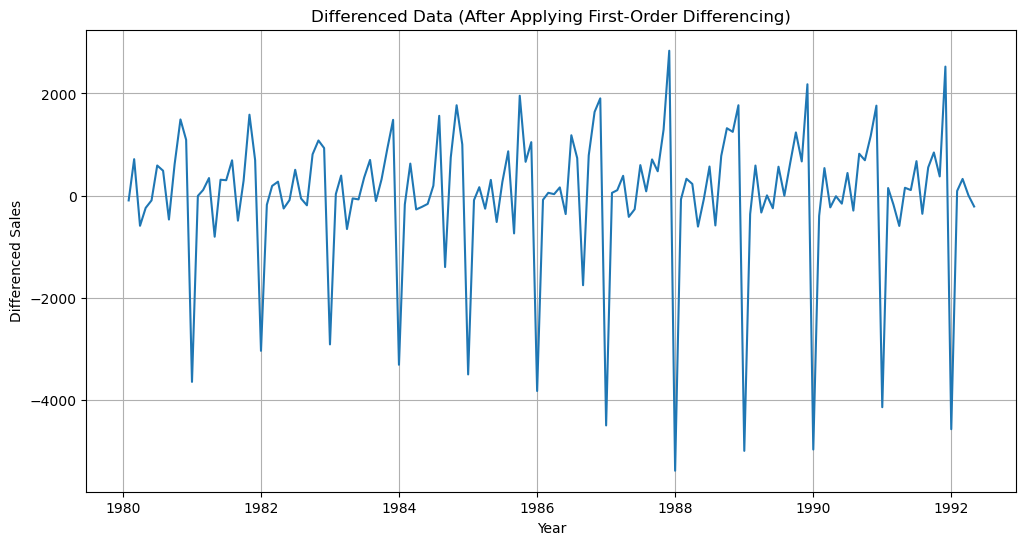

In [64]:
# Re-plot the differenced data

plt.figure(figsize=(12, 6))
plt.plot(df_diff)
plt.title('Differenced Data (After Applying First-Order Differencing)')
plt.xlabel('Year')
plt.ylabel('Differenced Sales')
plt.grid(True)
plt.show()

### Model Building - Stationary Data

### Generate ACF & PACF Plot and find the AR, MA values. 

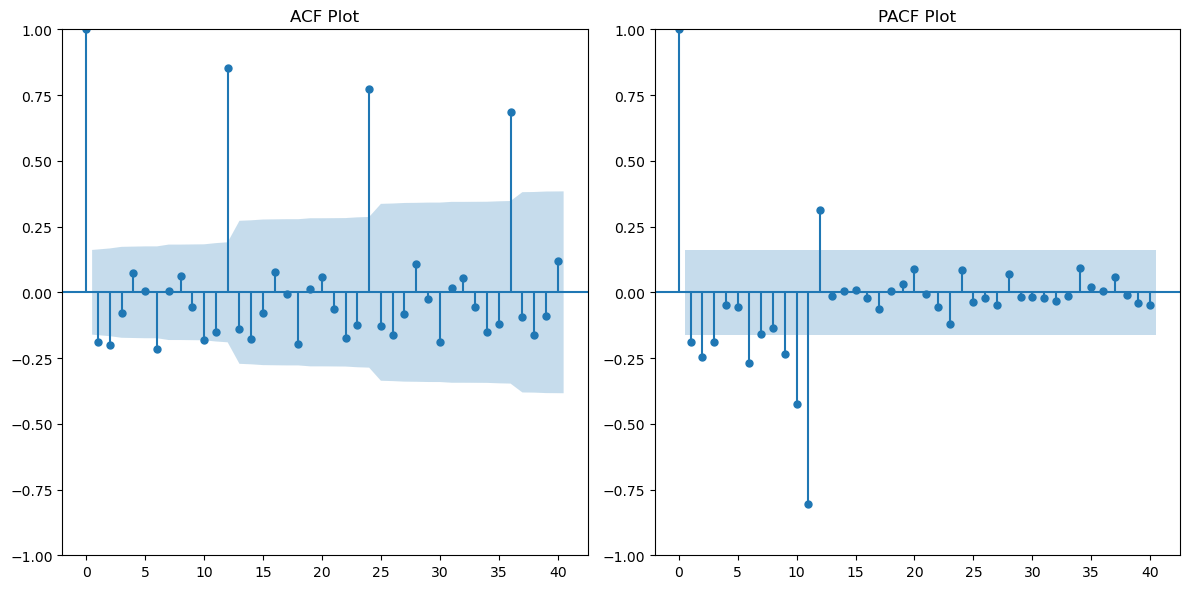

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for the differenced data
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df_diff, ax=plt.gca(), lags=40)
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df_diff, ax=plt.gca(), lags=40)
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


### Insights

**Seasonality Detection**

- In the ACF plot, you can see significant spikes at regular intervals (e.g., every 12 lags), suggesting a seasonal pattern.

**AR and MA Values**

- **AR (p) value:** The PACF shows a significant spike at lag 1, suggesting an AR(1) component.

- **MA (q) value:** The ACF shows a significant spike at lag 1, suggesting an MA(1) component.

### Build different ARIMA models
- Auto ARIMA 

In [66]:
# We’ll use the auto_arima function to automatically find the best ARIMA model by evaluating different combinations of (p, d, q) parameters.

print(train_data.shape)
print(test_data.shape)

(149, 1)
(38, 1)


In [67]:
from pmdarima import auto_arima

# Auto ARIMA model
auto_arima_model = auto_arima(train_data['Sparkling'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
auto_arima_model.summary()

# Forecast using the Auto ARIMA model
arima_forecast = auto_arima_model.predict(n_periods=len(test_data))

# Calculate RMSE for Auto ARIMA
arima_rmse = np.sqrt(metrics.mean_squared_error(test_data['Sparkling'], arima_forecast))
print(f'Auto ARIMA RMSE: {arima_rmse}')


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2780.518, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2578.818, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2677.322, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2578.299, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2574.041, Time=0.08 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=2572.184, Time=0.08 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=2574.112, Time=0.08 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=2548.464, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=2575.880, Time=0.20 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2537.225, Time=0

- Manual ARIMA 

In [68]:
from statsmodels.tsa.arima.model import ARIMA

# Manual ARIMA model (example: p=2, d=1, q=2)
manual_arima_model = ARIMA(train_data['Sparkling'], order=(2, 1, 2))
manual_arima_fit = manual_arima_model.fit()

# Forecast using Manual ARIMA
manual_arima_forecast = manual_arima_fit.forecast(steps=len(test_data))

# Calculate RMSE for Manual ARIMA
manual_arima_rmse = np.sqrt(metrics.mean_squared_error(test_data['Sparkling'], manual_arima_forecast))
print(f'Manual ARIMA RMSE: {manual_arima_rmse}')


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Manual ARIMA RMSE: 1326.541693141659


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Build different SARIMA models
- Auto SARIMA 

In [69]:
from pmdarima import auto_arima

# Auto SARIMA model with seasonality (s=12 for monthly data)
auto_sarima_model = auto_arima(train_data['Sparkling'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
auto_sarima_model.summary()

# Forecast using the Auto SARIMA model
sarima_forecast = auto_sarima_model.predict(n_periods=len(test_data))

# Calculate RMSE for Auto SARIMA
sarima_rmse = np.sqrt(metrics.mean_squared_error(test_data['Sparkling'], sarima_forecast))
print(f'Auto SARIMA RMSE: {sarima_rmse}')


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=2028.955, Time=2.36 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2052.130, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2031.254, Time=0.41 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2023.216, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2050.241, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=2046.569, Time=0.08 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=2024.299, Time=1.20 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=2024.372, Time=1.12 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=2030.648, Time=0.34 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=2026.266, Time=2.36 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2027.137, Time=0.50 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=2024.489, Time=1.22 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=2025.101, Time=0.69 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=2023.661, Time=0.70 sec
 ARIMA(1,0,2)(0,1,1

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Manual SARIMA model (example: p=1, d=1, q=1, P=1, D=1, Q=1, s=12)
manual_sarima_model = SARIMAX(train_data['Sparkling'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
manual_sarima_fit = manual_sarima_model.fit()

# Forecast using Manual SARIMA
manual_sarima_forecast = manual_sarima_fit.forecast(steps=len(test_data))

# Calculate RMSE for Manual SARIMA
manual_sarima_rmse = np.sqrt(metrics.mean_squared_error(test_data['Sparkling'], manual_sarima_forecast))
print(f'Manual SARIMA RMSE: {manual_sarima_rmse}')


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Manual SARIMA RMSE: 312.76737287623274


### Check the performance of the models built

In [71]:
print(f"Auto ARIMA RMSE: {arima_rmse}")
print(f"Manual ARIMA RMSE: {manual_arima_rmse}")
print(f"Auto SARIMA RMSE: {sarima_rmse}")
print(f"Manual SARIMA RMSE: {manual_sarima_rmse}")

Auto ARIMA RMSE: 1328.8422197840096
Manual ARIMA RMSE: 1326.541693141659
Auto SARIMA RMSE: 320.324912883244
Manual SARIMA RMSE: 312.76737287623274


### Compare the performance of the models
- Compare the performance of all the models built

In [72]:
# Compare RMSEs
performance = {
    'Auto ARIMA RMSE': arima_rmse,
    'Manual ARIMA RMSE': manual_arima_rmse,
    'Auto SARIMA RMSE': sarima_rmse,
    'Manual SARIMA RMSE': manual_sarima_rmse
}

# Find the best model 
best_model = min(performance, key=performance.get)
print(f'Best Model: {best_model} with RMSE: {performance[best_model]}') 


Best Model: Manual SARIMA RMSE with RMSE: 312.76737287623274


- Choose the best model with proper rationale

The model with the lowest RMSE is considered the best fit for the data. 
So,
- Best Model: Manual SARIMA RMSE with RMSE: 312.76737287623274


#### Rebuild the best model using the entire data

In [73]:
best_model_fit = SARIMAX(df['Sparkling'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
best_model_fit = best_model_fit.fit()

forecast_next_12 = best_model_fit.forecast(steps=12)
print("Forecast for the next 12 months:")
print(forecast_next_12)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forecast for the next 12 months:
1995-08-01    1866.405603
1995-09-01    2492.673153
1995-10-01    3297.095457
1995-11-01    3929.714437
1995-12-01    6129.903208
1996-01-01    1243.835102
1996-02-01    1576.836427
1996-03-01    1839.227873
1996-04-01    1819.403970
1996-05-01    1664.272186
1996-06-01    1616.792081
1996-07-01    2017.439099
Freq: MS, Name: predicted_mean, dtype: float64


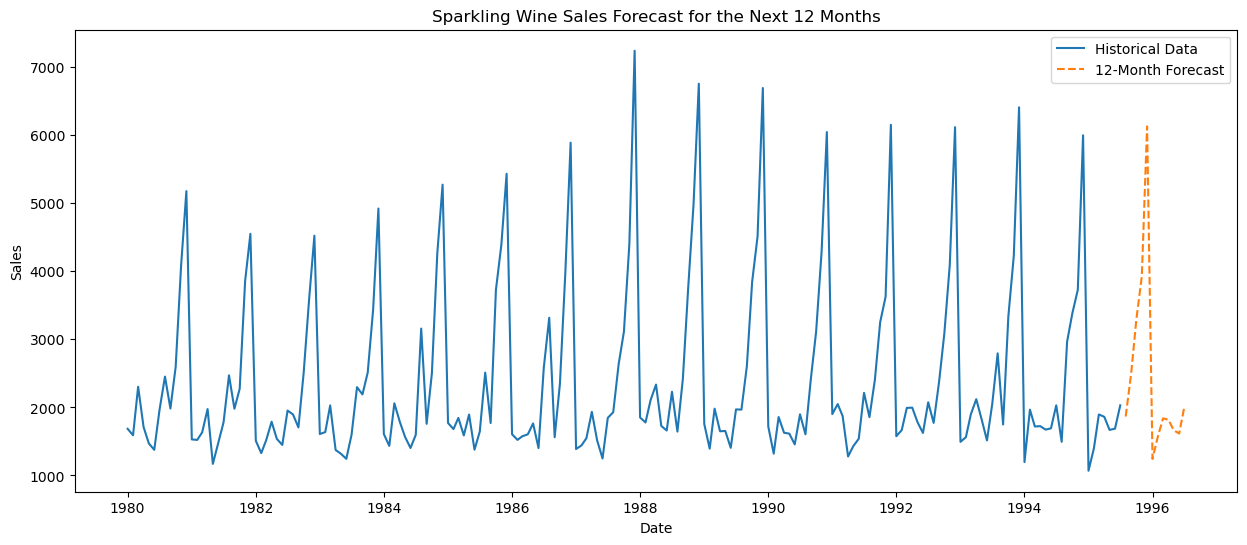

In [74]:
# Plot the forecasted values along with the historical data
plt.figure(figsize=(15, 6))
plt.plot(df['Sparkling'], label='Historical Data')
plt.plot(forecast_next_12, label='12-Month Forecast', linestyle='--')
plt.title('Sparkling Wine Sales Forecast for the Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Actionable Insights & Recommendations
- Conclude with the key takeaways (actionable insights and recommendations) for the business

- #### Seasonal Demand Patterns:
The sales data for sparkling wine shows clear seasonal peaks, particularly around certain periods each year. This suggests that demand is higher during specific months, likely due to holidays or celebrations.
- #### Consistent Growth Trend:
Over the years, there is an upward trend in sales, indicating a growing market for sparkling wine. This suggests a positive long-term outlook for the product.
- #### Predictive Accuracy:
The model used for forecasting captures both the seasonality and trend effectively, as demonstrated by the accurate 12-month forecast aligned with historical patterns.

#### Model Choice:
- #### SARIMA Model:
- This model was chosen because it effectively captures both the trend and seasonality present in the data. It uses seasonal differencing to handle the periodic peaks and troughs, making it well-suited for forecasting sales that fluctuate seasonally.

#### Business Benefits:
- #### Inventory Management:
By understanding the seasonal demand, the company can optimize inventory levels, ensuring sufficient stock during peak periods while reducing excess inventory during off-peak times.
- #### Marketing Strategies:
The forecast allows for targeted marketing campaigns during high-demand periods, potentially increasing sales and market share.
- #### Resource Allocation:
With accurate sales predictions, resources such as labor and logistics can be better allocated to meet demand efficiently, reducing costs and improving service levels.
- #### Strategic Planning:
The insights from the forecast can inform long-term strategic decisions, such as expanding production capacity or entering new markets during growth phases.

- By adopting this model, the company can enhance its decision-making process, align operations with market demand, and capitalize on growth opportunities in the sparkling wine market

